## Jupyteer Notebook tho accompany the paper:

## **Slow true polar wander around varying equatorial axes during the last 320 Ma**

#### **by B. Vaes & D.J.J. van Hinsbergen** 
#### September 2024

In [2]:
# REQUIRES THE CORRECT INSTALLATION OF THE PMAGPY SOFTWARE PACKAGE (TAUXE ET AL. 2016)

import numpy as np 
import pandas as pd
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import rot_functions as rf
%matplotlib inline

# CHECK IF CARTOPY IS INSTALLED
has_cartopy, cartopy = pmag.import_cartopy()

if has_cartopy == True:
  print('Cartopy installed')
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature

Cartopy installed


### Store input APWP to be rotated

In [4]:
# CHOOSE PUBLISHED OR INTERPOLATED APWP
gapwap = 'V23_int' # choose global APWP (V23 = Global APWP of Vaes et al. 2023, V23_int = interpolated, V23_int_5 = interpolated at 5 Ma steps)
t_max = 320 # define maximum age 
dt = 10 # define time step of polar wander paths
frame = 'M22' # choose mantle reference frame (M93, T08, D12 or M22)

# LOAD INPUT FILE WITH CORRECT GLOBAL APWP
fn='input_APWP.xlsx'
if gapwap == 'V23':
    df=pd.read_excel(fn,sheet_name=gapwap,skiprows=None,header=0,usecols='A:H') # published
else:
    df=pd.read_excel(fn,sheet_name=gapwap,skiprows=None,header=0,usecols='A:G') # interpolated

# Store key data in lists
lats,lons,P95s,ages=df['lat'],df['lon'],df['P95'],df['age']
N_ages=len(lats)

print(df.head())

          lon        lat       P95  age   PW_rate  PW_rate_low  PW_rate_high
0    0.000000 -90.000000  0.000000    0  0.351033     0.235036      0.465416
1  355.145673 -86.489672  1.182012   10  0.351033     0.235036      0.465416
2    8.040264 -83.184821  1.174369   20  0.348220     0.292950      0.408852
3   23.840562 -80.583607  0.920550   30  0.340365     0.268963      0.421505
4   26.932227 -78.991431  1.268922   40  0.168334     0.093096      0.255045


### Load data in Numpy array

In [6]:
data=np.loadtxt('GAPWAP_plate_circuit_%s.rot' % frame,comments='!')    # reads rotation file
plate_IDs=data[:,0]     # stores plate IDs in array
ages=data[:,1]          # stores ages of rotation poles in array
file_length=len(plate_IDs)  # computes length of rotation file

print(data)

[[ 701.        0.        0.        0.        0.        0.    ]
 [ 701.      330.        0.        0.        0.        0.    ]
 [ 101.        0.        0.        0.        0.      714.    ]
 ...
 [1000.      325.       -6.6961  143.4235  -46.254   701.    ]
 [1000.      330.       -5.6161  143.3763  -46.0281  701.    ]
 [1000.      335.        4.6288  -38.3245   45.861   701.    ]]


### Specific plate and ages for TPWP

In [8]:
#--------------------
# SPECIFY PLATE AND AGES

plate_ID = 701 # plate ID of South Africa
fixed_plate_ID = 1000 # plate ID of mantle

init_plate_ID=plate_ID
plate_ID_in_file=False
for i in range(file_length):    # checks if plate ID is included in rotation file
    if (plate_IDs[i]==plate_ID):
        plate_ID_in_file=True
        break
if plate_ID_in_file==False:
    print('Error: Plate ID is not in file')

if (fixed_plate_ID==plate_ID):
    print('Error: plate IDs are equal')
fixed_plate_ID_in_file=False
for i in range(file_length):    # checks if plate ID is included in rotation file
    if (plate_IDs[i]==fixed_plate_ID or fixed_plate_ID==0):
        fixed_plate_ID_in_file=True
        break
if fixed_plate_ID_in_file==False:
    print('Error: Fixed plate ID is not in file')
              
# CREATE LIST OF AGES
t = []
if t_max > 120 and (frame == 'M93' or frame == 'T08' or frame == 'D12'):
    print('ERROR: CHOOSE MAXIMUM AGE OF 120 OR LOWER')
else:
    for k in range(len(df['age'])):
        if df['age'][k]<=t_max:
            t.append(df['age'][k])
        else:
            break
print('Ages for TPWP:', t)

Ages for TPWP: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]


## Print results

In [10]:
# PRINT OUTPUT HEADER                
print(' ')
print('Euler poles of', init_plate_ID, 'relative to', fixed_plate_ID)
print('Age Lat Lon Angle')

# COMPUTE TOTAL RECONSTRUCTION POLES AT GIVEN TIMES
tr_poles = []
for i in range(len(t)):         # loops over selected times
    if (t[i]==0):           
        print(0,',',0,',',0,',',t[i])    # prints pole at t=0 Ma
        tr_poles.append([0,0,0])
    else:
        plate_pole=rf.rot2frame(data,plate_ID,t[i])                 # computes pole of selected plate rel. to reference frame
        fixed_plate_pole=rf.rot2frame(data,fixed_plate_ID,t[i])     # computes pole of fixed plate rel. to reference frame
        fixed_plate_pole[2]=-1*fixed_plate_pole[2]          # changes sign of rotation angle
        POLE=rf.addpoles(plate_pole,fixed_plate_pole)          # computes total reconstruction pole
        tr_poles.append(POLE)

        #---------------------------------
        # PRINT ROTATION POLES
        print(t[i],',',np.round(POLE[0],3),',',np.round(POLE[1],3),',',np.round(POLE[2],3)) # print .rot file order (age,lat,lon,ang)

 
Euler poles of 701 relative to 1000
Age Lat Lon Angle
0 , 0 , 0 , 0
10 , -68.183 , 129.855 , 2.545
20 , -69.64 , 134.619 , 4.739
30 , -59.782 , 139.274 , 6.97
40 , -51.561 , 145.561 , 9.04
50 , -48.67 , 146.296 , 11.779
60 , -46.558 , 143.575 , 13.406
70 , -42.545 , 142.159 , 14.672
80 , -37.781 , 141.863 , 18.699
90 , -32.252 , 140.956 , 24.338
100 , -28.898 , 142.414 , 29.114
110 , -25.864 , 145.656 , 33.123
120 , -22.215 , 147.839 , 38.075
130 , -19.28 , 147.735 , 41.089
140 , -18.64 , 148.694 , 43.27
150 , -20.548 , 149.321 , 43.908
160 , -19.216 , 149.397 , 44.913
170 , -17.655 , 150.068 , 46.458
180 , -17.094 , 151.65 , 46.362
190 , -17.019 , 152.509 , 46.728
200 , -16.33 , 152.374 , 47.413
210 , -15.652 , 149.435 , 46.956
220 , -14.773 , 145.589 , 47.227
230 , -14.128 , 143.259 , 47.512
240 , -12.06 , 143.344 , 46.901
250 , -9.855 , 143.529 , 46.424
260 , -10.827 , 143.673 , 46.614
270 , -10.831 , 143.718 , 46.513
280 , -10.324 , 143.575 , 46.513
290 , -9.287 , 143.773 , 46.78

### Rotate input APWP using total reconstruction Euler poles

In [12]:
# USE EULER ROTATION POLE OF CONTINENT FOR WHICH APWP WAS CALCULATED, RELATIVE TO CONTINENT FOR WHICH NEW POLES ARE CALCULATED
# I.E. TO TRANSFER SOUTH AFRICAN APWP TO INDIA, USE EULER ROTATION POLE OF SOUTH AFRICA RELATIVE TO INDIA

rlats,rlons=[],[]
for i in range(len(t)):
    rlon,rlat=rf.pt_rot(tr_poles[i],[lats[i]],[lons[i]])
    rlats.append(rlat[0])
    rlons.append(rlon[0])

# change sign of pole latitudes
rlons = [rlons[i]-180 for i in range(len(tr_poles))]
rlats = [rlats[i]*-1 for i in range(len(tr_poles))]

### Save output to file

In [14]:
rot_APWP=pd.DataFrame(list(zip(rlons,rlats,P95s,t)),columns=['plon','plat','P95','age'])
print(rot_APWP)
rot_APWP.to_csv('rot_APWP_%2d.csv' % fixed_plate_ID, index=None, header=True)      # write directions to CSV file

#print(pmag.angle([rot_APWP['plon'][26],rot_APWP['plat'][26]],[rot_APWP['plon'][20],rot_APWP['plat'][20]]))

          plon       plat       P95  age
0  -180.000000  90.000000  0.000000    0
1   159.407594  87.068264  1.182012   10
2   173.061985  84.374369  1.174369   20
3  -176.848711  83.452106  0.920550   30
4   174.524793  83.075229  1.268922   40
5   171.373753  82.063469  0.908350   50
6  -179.300079  81.405859  0.804463   60
7  -169.343260  82.983224  0.909750   70
8  -176.907579  86.681701  1.205977   80
9   -68.434103  86.943856  1.502549   90
10  -54.610777  83.140217  1.791618  100
11  -43.186603  81.694167  1.333516  110
12  -31.037079  81.582271  1.110131  120
13  -33.287767  78.988814  0.772723  130
14  -21.938424  78.260342  1.205804  140
15  -10.963150  78.928108  2.610467  150
16    8.458216  77.194991  3.004884  160
17   26.680488  75.434387  3.226711  170
18   38.707000  71.844781  1.616876  180
19   49.091147  69.378653  1.404893  190
20   58.750487  68.990602  1.398195  200
21   64.580947  71.515656  1.265091  210
22   66.439875  75.023396  1.080823  220
23   62.186174  

### Plot APWPs

<Figure size 4800x3200 with 0 Axes>

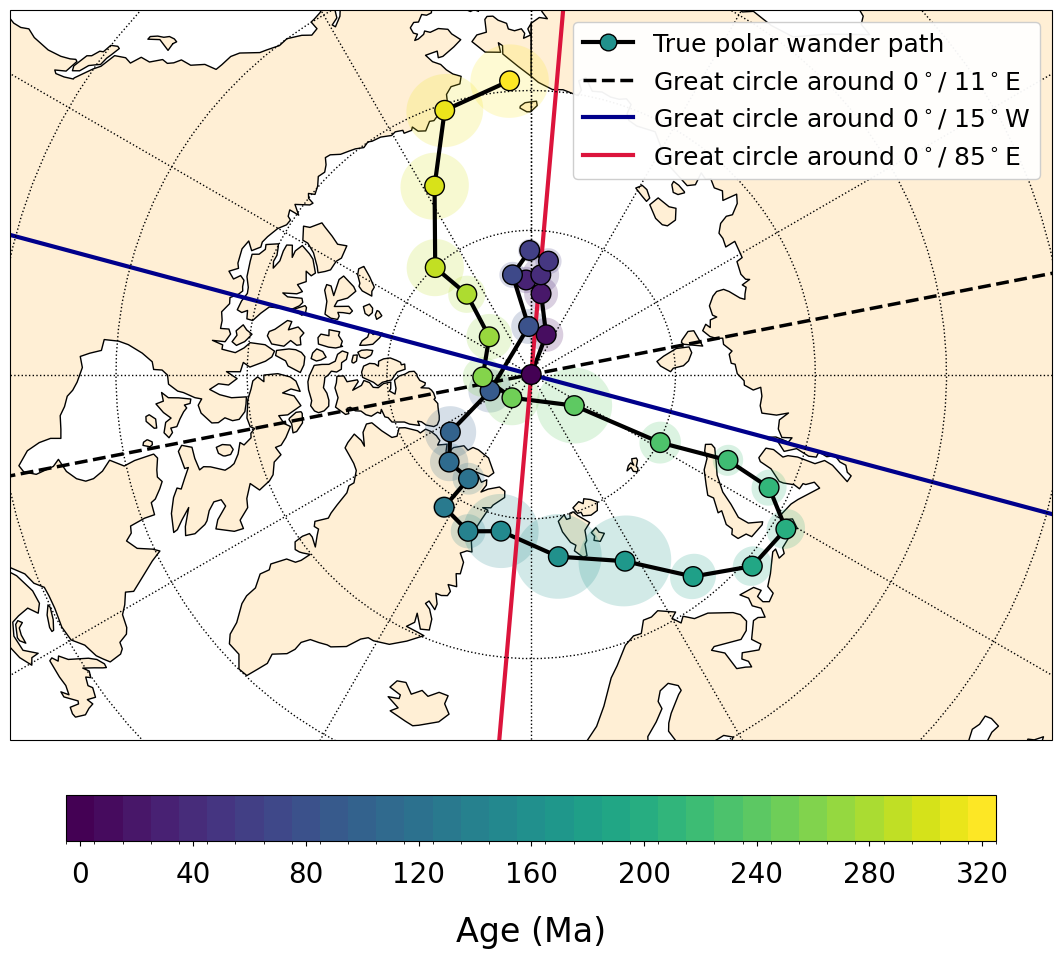

In [16]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# ----------
# USE APWP FROM INPUT
# input_filename='~/Python/Paleomagic/Ch7/TPWP_M22_1000i.csv'
# rot_APWP = pd.read_csv(input_filename,skiprows=0,header=0,skip_blank_lines=True) # build dataframe from Excel input file
# # convert to northern hemisphere
# rot_APWP['plat'] = rot_APWP['plat'].apply(lambda x: x*-1)
# rot_APWP['plon'] = rot_APWP['plon'].apply(lambda x: x-180. % 360)
# print(rot_APWP)
# ----------

# plot global APWP
plt.rcParams['axes.facecolor']='white'
cmap = plt.cm.viridis

map_axis = plt.figure(figsize=(12,8),facecolor='white',dpi=400)
map_axis = ipmag.make_orthographic_map(central_longitude=0, central_latitude=90,figsize=(20,12),land_color='papayawhip',lat_grid=[40.,50.,60.,70.,80.,90.])

# Change first reference pole longitude to negative values
rot_APWP.loc[rot_APWP['plon'] > 180, 'plon'] = rot_APWP['plon'] - 360
df.loc[df['lon'] > 180, 'lon'] = df['lon'] - 360

# plot reference global APWP
#ipmag.plot_poles(map_axis, df.loc[0:(t_max/10),'lon'], df.loc[0:(t_max/10),'lat'], df.loc[0:(t_max/10),'P95'], filled_pole=True, markersize=80, fill_alpha=0.1, outline=False, label='Torsvik et al. (2012)')
#plt.plot(df.loc[0:(t_max/10),'lon'], df.loc[0:(t_max/10),'lat'], transform=ccrs.Geodetic(), color = 'k', linestyle = ':', lw=2) # Add lines connecting reference poles
# ------
# plot new APWP
ipmag.plot_poles_colorbar(map_axis, rot_APWP.plon, rot_APWP.plat, rot_APWP.P95, rot_APWP.age, 0, t_max, markersize=200,edgecolor='k',filled_pole=True,fill_alpha=0.2,outline=False,colorbar=False)
plt.plot(rot_APWP.plon, rot_APWP.plat, transform=ccrs.Geodetic(), color = 'k', linestyle = '-', lw=3) # plot connecting lines

# plot great circle around chosen TPW pole
plt.plot([101,-79],[0,0],transform=ccrs.Geodetic(), color = 'k', linestyle = '--', lw=2.5) # plot around 0N/11E axis 
 
# Add colorbar
if t_max == 320:
    ticks = [0,40,80,120,160,200,240,280,320]
    plt.plot([75,-105],[0,0],transform=ccrs.Geodetic(), color = 'darkblue', linestyle = '-', lw=3) # plot around 0N/10W axis 
    plt.plot([175,-5],[0,0],transform=ccrs.Geodetic(), color = 'crimson', linestyle = '-', lw=3) # plot around 0N/85E axis
else:
    ticks = [0,40,80,120]
    #ipmag.plot_pole(map_axis,0,90,5, markersize=0, outline=True, color='grey')
sm = plt.cm.ScalarMappable(
            cmap='viridis', norm=BoundaryNorm(range(-5,t_max+10,10),cmap.N))
            #cmap='viridis', norm=BoundaryNorm(range(-2,328,5),cmap.N))
cb = plt.colorbar(sm, orientation = 'horizontal', ticks = ticks, shrink=0.6, pad=0.06) 
cb.set_label(label = 'Age (Ma)',size=24,labelpad=20)
cb.ax.set_xticklabels(ticks)
cb.ax.tick_params(labelsize=20,pad=10)

# -----
if t_max == 320:
    legend_elements = [Line2D([0], [0], marker='o', color='k',markerfacecolor=cmap(0.5), markeredgecolor='k', label='True polar wander path',markersize=12,lw=3,ls='-'),
                      Line2D([0], [0], marker=None, color='k',label='Great circle around 0$^\circ$/ 11$^\circ$E',lw=2.5, ls='--'),
                      Line2D([0], [0], marker=None, color='darkblue',label='Great circle around 0$^\circ$/ 15$^\circ$W',lw=3),
                      Line2D([0], [0], marker=None, color='crimson',label='Great circle around 0$^\circ$/ 85$^\circ$E',lw=3),
                      ]
    plt.legend(loc=1, fontsize = 18, handles = legend_elements, framealpha=0.95)
    map_axis.set_extent([-55,125,85,40])
else:
    legend_elements = [Line2D([0], [0], marker='o', color='k',markerfacecolor=cmap(0.5), markeredgecolor='k', label='True polar wander path',markersize=14,lw=3,ls='-'),
                   Line2D([0], [0], marker=None, color='k',label='Great circle around 0$^\circ$/ 11$^\circ$E',lw=2.5, ls='--')]
    plt.legend(loc=8, fontsize = 24, handles = legend_elements, framealpha=0.95)
    
    map_axis.set_extent([-55,125,90,65])

# Specify title
if frame == 'T08':
    plt.title('Indo-Atlantic moving hotspot frame (Torsvik et al. 2008)', fontsize = 24, pad = 15)
elif frame == 'D12':
    plt.title('Global moving hotspot frame (Doubrovine et al. 2012)', fontsize = 24, pad = 15)
elif frame == 'M93':
    plt.title('Indo-Atlantic fixed hotspot frame (Müller et al. 1993)', fontsize = 24, pad = 15)
elif frame == 'M22' and t_max == 120:
    plt.title('Tectonic rules frame (Müller et al. 2022)', fontsize = 24, pad = 15)

plt.savefig('TPWP_%s.png' % frame,facecolor='white',dpi=300,bbox_inches='tight')
plt.savefig('TPWP_%s.svg' % frame,bbox_inches='tight',facecolor='white',dpi=500)
plt.show()

## Compute and plot rates

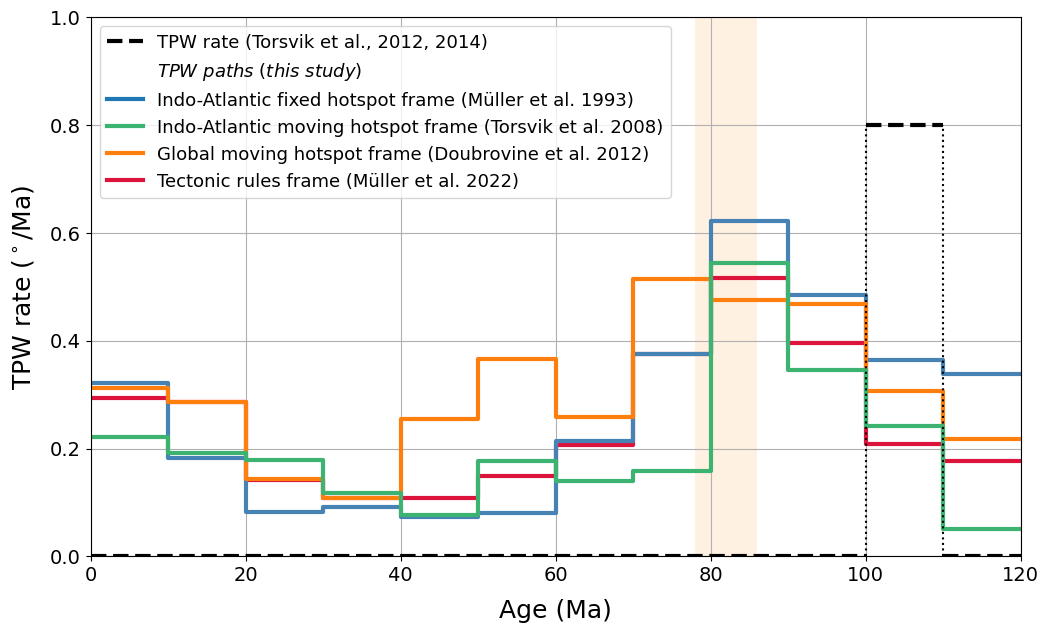

In [18]:
TPWPs=pd.read_excel(fn,sheet_name='TPWPs',skiprows=None,header=0,usecols='A:J')
    
rates_M22,rates_M93,rates_D12,rates_T08 = [],[],[],[]

# compute rates
for k in range(12):
    angle_M22 = pmag.angle([TPWPs['lon_M22'][k],TPWPs['lat_M22'][k]],[TPWPs['lon_M22'][k+1],TPWPs['lat_M22'][k+1]])
    rates_M22.append(angle_M22[0]/10)

    angle_M93 = pmag.angle([TPWPs['lon_M93'][k],TPWPs['lat_M93'][k]],[TPWPs['lon_M93'][k+1],TPWPs['lat_M93'][k+1]])
    rates_M93.append(angle_M93[0]/10)

    angle_D12 = pmag.angle([TPWPs['lon_D12'][k],TPWPs['lat_D12'][k]],[TPWPs['lon_D12'][k+1],TPWPs['lat_D12'][k+1]])
    rates_D12.append(angle_D12[0]/10)

    angle_T08 = pmag.angle([TPWPs['lon_T08'][k],TPWPs['lat_T08'][k]],[TPWPs['lon_T08'][k+1],TPWPs['lat_T08'][k+1]])
    rates_T08.append(angle_T08[0]/10)

    if k==0: 
        rates_M22.append(angle_M22[0]/10)
        rates_M93.append(angle_M93[0]/10)
        rates_D12.append(angle_D12[0]/10)
        rates_T08.append(angle_T08[0]/10)

# plot APW rates of rotated APWP
fignum=1
plt.figure(num=fignum,figsize=(12,7),facecolor='white',dpi=100)

# PW rates
plt.step(range(0,130,10),rates_M22,lw=3,color='crimson')
plt.step(range(0,130,10),rates_M93,lw=3,color='steelblue')
plt.step(range(0,130,10),rates_D12,lw=3,color='tab:orange')
plt.step(range(0,130,10),rates_T08,lw=3,color='mediumseagreen')

# get TPW rates from Torsvik et al. (2014)
plt.hlines(0,0,100,lw=3,color='k',ls='--')
plt.hlines(0.8,100,110,lw=3,color='k',ls='--')
plt.hlines(0,110,120,lw=3,color='k',ls='--')
plt.vlines(100,0,0.8, color='k', linestyle=':', linewidth=1.5)
plt.vlines(110,0,0.8, color='k', linestyle=':', linewidth=1.5)

plt.fill_between(range(78,87),y1=0,y2=1.8,color='bisque',alpha=0.5,lw=0) # highlight proposed Late Cretaceous TPW event

plt.xlabel('Age (Ma)',fontsize=18,labelpad=10)
plt.ylabel('TPW rate ($^\circ$/Ma)',fontsize=18,labelpad=10)
plt.ylim([0,1])
plt.xlim([0,120])
plt.tick_params(labelsize=14)
plt.grid(which='major',axis='both')
legend_elements = [Line2D([0], [0], color='crimson', label='Tectonic rules frame: (Müller et al. 2022)',lw=2.5)]
plt.legend(loc=1,fontsize=15, handles=legend_elements)

# -----
legend_elements = [
              Line2D([0], [0], marker=None, color='k',markerfacecolor='k', markeredgecolor='k', label='TPW rate (Torsvik et al., 2012, 2014)',lw=3,ls='--'),
              Line2D([0], [0], marker=None, color='white',markerfacecolor='white', markeredgecolor='white', label='$\it{TPW\ paths\ (this\ study)}$',lw=3),
              Line2D([0], [0], marker=None, color='tab:blue',markerfacecolor='steelblue', markeredgecolor='k', label='Indo-Atlantic fixed hotspot frame (Müller et al. 1993)',lw=3),
              Line2D([0], [0], marker=None, color='mediumseagreen',markerfacecolor='mediumseagreen', markeredgecolor='k', label='Indo-Atlantic moving hotspot frame (Torsvik et al. 2008)',lw=3),
              Line2D([0], [0], marker=None, color='tab:orange',markerfacecolor='k', markeredgecolor='k', label='Global moving hotspot frame (Doubrovine et al. 2012)',lw=3),
              Line2D([0], [0], marker=None, color='crimson',markerfacecolor='crimson', markeredgecolor='k', label='Tectonic rules frame (Müller et al. 2022)',lw=3)
              ]
plt.legend(loc=2, fontsize = 13, handles = legend_elements)
plt.savefig('TPW_rates_all4.png',facecolor='white',dpi=300,bbox_inches='tight')
plt.savefig('TPW_rates_all4.svg',bbox_inches='tight',facecolor='white',dpi=500)
plt.show()

# Plot polar wander paths

## Compute polar wander path

In [21]:
print(data)
plate_IDs=data[:,0]     # stores plate IDs in array
ages_file=data[:,1]     # stores ages in array
file_length=len(plate_IDs)  # computes length of rotation file
MPWP_lats,MPWP_lons,MPWP_ages=[],[],[]

for j in range(file_length):       # loops through rotation file
    if plate_IDs[j] == 1000 and ages_file[j] <= t_max:
        age_of_pole = ages_file[j]
        #TRP = [tr_poles[j][0],tr_poles[j][1],tr_poles[j][2]*-1]
        TRP = [data[j,2],data[j,3],data[j,4]]
        plat_0, plon_0 = -90,0     # reference pole is south geographic pole
        rlon,rlat=rf.pt_rot(TRP,[plat_0],[plon_0])   # rotate with total reconstruction pole
    
        MPWP_lats.append(rlat[0])
        MPWP_lons.append(rlon[0])
        MPWP_ages.append(age_of_pole)

[[ 701.        0.        0.        0.        0.        0.    ]
 [ 701.      330.        0.        0.        0.        0.    ]
 [ 101.        0.        0.        0.        0.      714.    ]
 ...
 [1000.      325.       -6.6961  143.4235  -46.254   701.    ]
 [1000.      330.       -5.6161  143.3763  -46.0281  701.    ]
 [1000.      335.        4.6288  -38.3245   45.861   701.    ]]


### Plot polar wander paths

<Figure size 1500x1200 with 0 Axes>

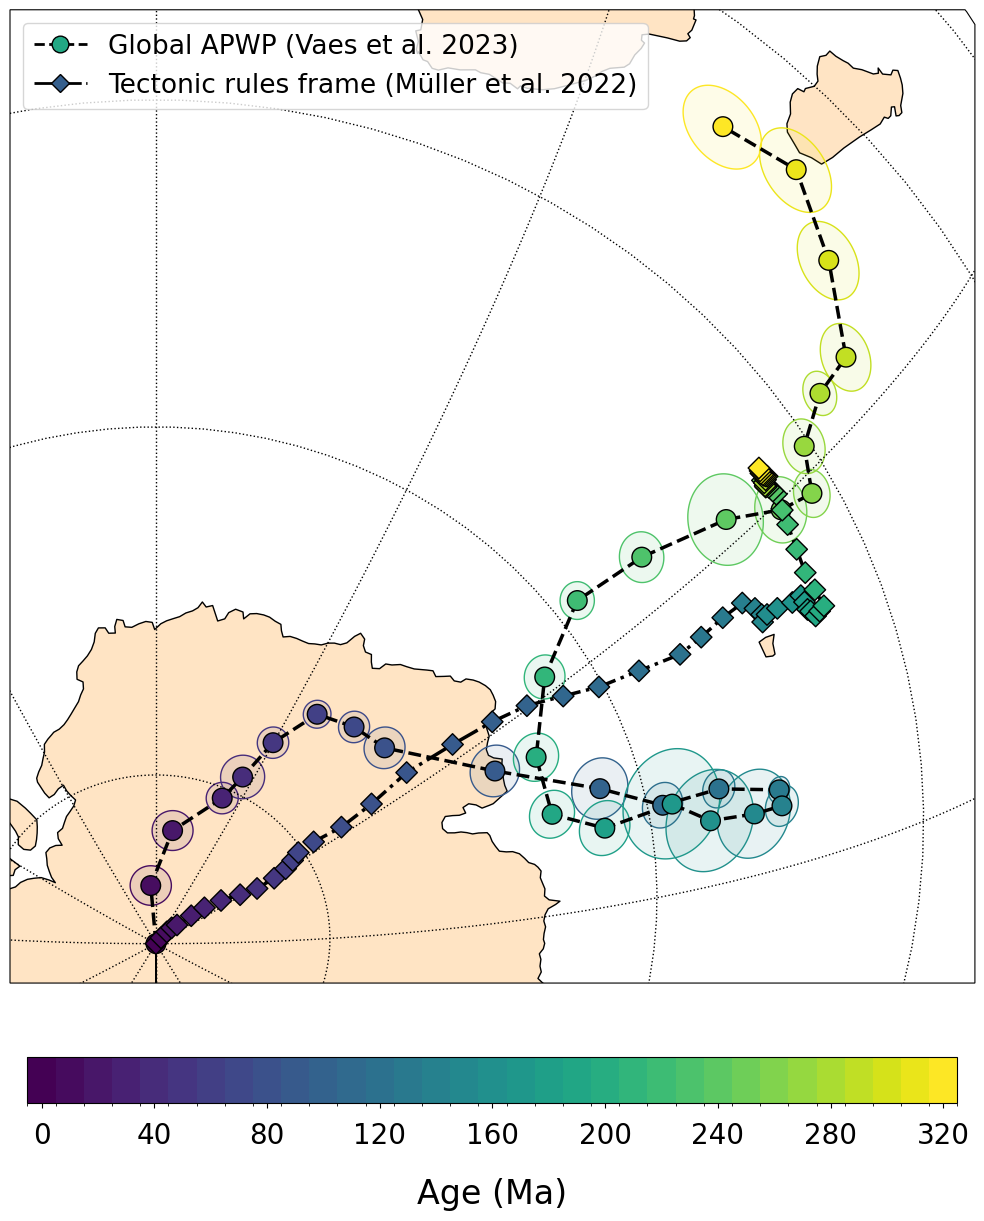

In [23]:
# plot global APWP
plt.rcParams['axes.facecolor']='white'
cmap = plt.cm.viridis
cbar_max_age = 320

map_axis = plt.figure(figsize=(10,8),facecolor='white',dpi=150)
map_axis = ipmag.make_orthographic_map(central_longitude=0, central_latitude=-70,figsize=(20,16),land_color='bisque',lat_grid=[0,-20.,-40.,-60.,-80.,-90.])

# plot global APWP
ipmag.plot_poles_colorbar(map_axis, df.lon, df.lat, df.P95, df.age, 0, cbar_max_age, markersize=200,edgecolor='k',filled_pole=True,fill_alpha=0.1,outline=True,colorbar=False)
plt.plot(df.lon, df.lat, transform=ccrs.Geodetic(), color = 'k', linestyle = '--', lw=2.5) # plot connecting lines

# plot polar wander path from mantle frame
ipmag.plot_poles_colorbar(map_axis, MPWP_lons, MPWP_lats, len(MPWP_lons)*[], MPWP_ages, 0, cbar_max_age, markersize=120,marker='D',edgecolor='k',filled_pole=False,fill_alpha=0.1,outline=False,colorbar=False)
plt.plot(MPWP_lons,MPWP_lats, transform=ccrs.Geodetic(), color = 'k', linestyle = '-.', lw=2.5) # plot connecting lines

# Add colorbar
if t_max == 320:
    ticks = [0,40,80,120,160,200,240,280,320]
else:
    ticks = [0,40,80,120]
sm = plt.cm.ScalarMappable(
            cmap='viridis', norm=BoundaryNorm(range(-5,cbar_max_age+10,10),cmap.N))
            #cmap='viridis', norm=BoundaryNorm(range(-2,328,5),cmap.N))
cb = plt.colorbar(sm, orientation = 'horizontal', ticks = ticks, shrink=0.6, pad=0.06) 
cb.set_label(label = 'Age (Ma)',size=24,labelpad=20)
cb.ax.set_xticklabels(ticks)
cb.ax.tick_params(labelsize=20,pad=10)

# -----
legend_elements = [Line2D([0], [0], marker='o', color='k',markerfacecolor=cmap(0.6), markeredgecolor='k', label='Global APWP (Vaes et al. 2023)',markersize=12,ls='--',lw=2),
                  Line2D([0], [0], marker='D', color='k',markerfacecolor=cmap(0.3), markeredgecolor='k', label='Tectonic rules frame (Müller et al. 2022)',markersize=9,ls='-.',lw=2)]
plt.legend(loc=2, fontsize = 19, handles = legend_elements)
map_axis.set_extent([-10,103,-90,-33]) # normal extent
plt.savefig('PWPs.png',bbox_inches='tight',facecolor='white',dpi=300)
plt.savefig('PWPs.svg',bbox_inches='tight',facecolor='white',dpi=500)
plt.show()

<Figure size 1500x1200 with 0 Axes>

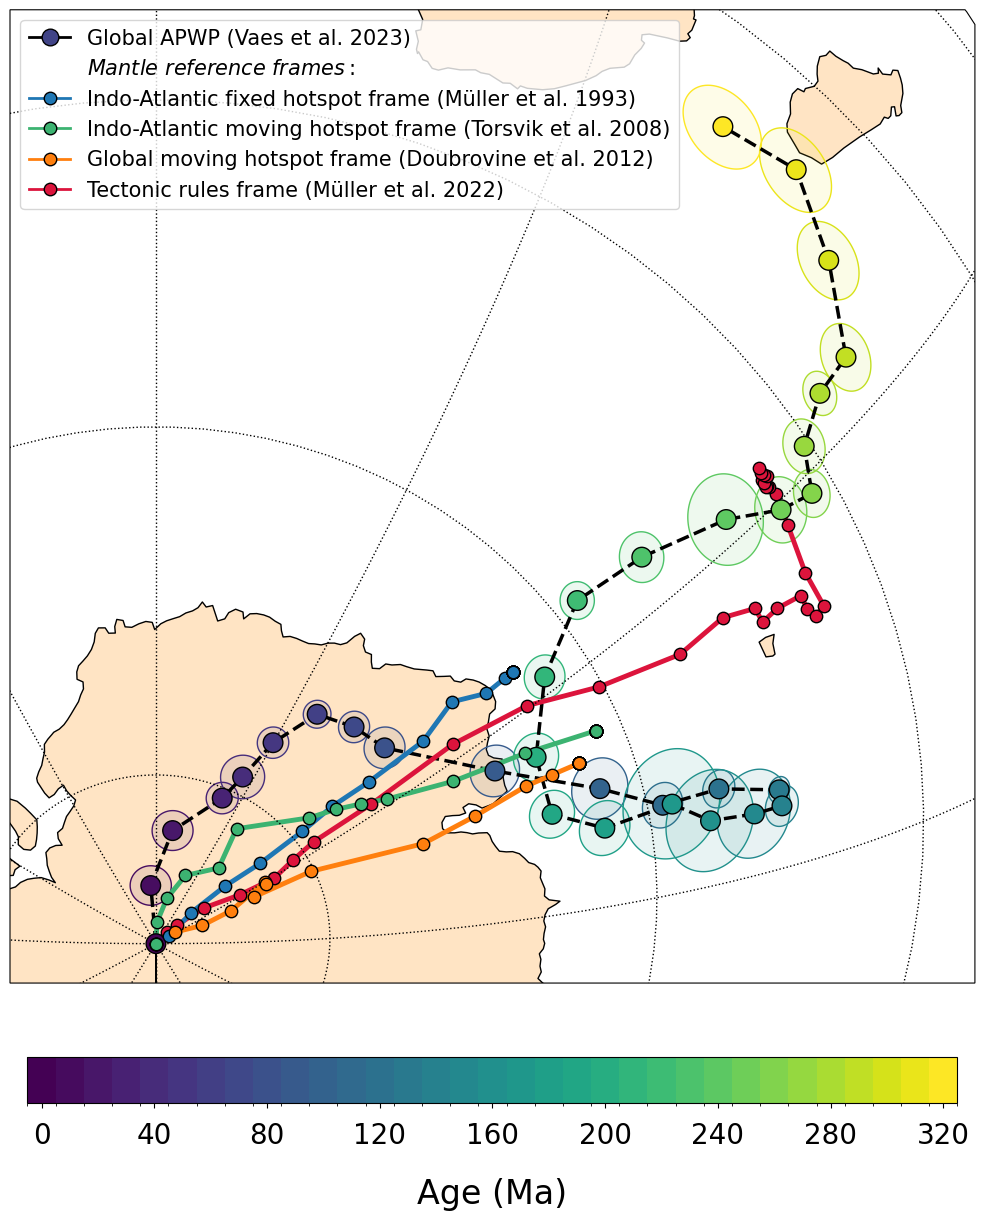

In [24]:
# plot global APWP
plt.rcParams['axes.facecolor']='white'
cmap = plt.cm.viridis
cbar_max_age = 320

PWPs=pd.read_excel(fn,sheet_name='PWPs',skiprows=None,header=0,usecols='A:I')

map_axis = plt.figure(figsize=(10,8),facecolor='white',dpi=150)
map_axis = ipmag.make_orthographic_map(central_longitude=0, central_latitude=-70,figsize=(20,16),land_color='bisque',lat_grid=[0,-20.,-40.,-60.,-80.,-90.])

# plot global APWP
ipmag.plot_poles_colorbar(map_axis, df.lon, df.lat, df.P95, df.age, 0, cbar_max_age, markersize=200,edgecolor='k',filled_pole=True,fill_alpha=0.1,outline=True,colorbar=False)
plt.plot(df.lon, df.lat, transform=ccrs.Geodetic(), color = 'k', linestyle = '--', lw=2.5) # plot connecting lines

# plot polar wander path from mantle frame
# M22
ipmag.plot_poles(map_axis, PWPs.lon_M22, PWPs.lat_M22, len(PWPs.lon_M22)*[0],color='crimson',marker='o',filled_pole=False, markersize=80,outline=False)
plt.plot(PWPs.lon_M22, PWPs.lat_M22, transform=ccrs.Geodetic(), color = 'crimson', linestyle = '-', lw=3.5) # plot connecting lines
# M93
ipmag.plot_poles(map_axis, PWPs.lon_M93, PWPs.lat_M93, len(PWPs.lon_M93)*[0],color='tab:blue',marker='o',filled_pole=False, markersize=80,outline=False)
plt.plot(PWPs.lon_M93, PWPs.lat_M93, transform=ccrs.Geodetic(), color = 'tab:blue', linestyle = '-', lw=3.5) # plot connecting lines
# D12
ipmag.plot_poles(map_axis, PWPs.lon_D12, PWPs.lat_D12, len(PWPs.lon_D12)*[0],color='tab:orange',marker='o',filled_pole=False, markersize=80,outline=False)
plt.plot(PWPs.lon_D12, PWPs.lat_D12, transform=ccrs.Geodetic(), color = 'tab:orange', linestyle = '-', lw=3.5) # plot connecting lines
# T08
ipmag.plot_poles(map_axis, PWPs.lon_T08, PWPs.lat_T08, len(PWPs.lon_T08)*[0],color='mediumseagreen',marker='o',filled_pole=False, markersize=80,outline=False)
plt.plot(PWPs.lon_T08, PWPs.lat_T08, transform=ccrs.Geodetic(), color = 'mediumseagreen', linestyle = '-', lw=3.5) # plot connecting lines

# Add colorbar
if cbar_max_age == 320:
    ticks = [0,40,80,120,160,200,240,280,320]
else:
    ticks = [0,40,80,120]
sm = plt.cm.ScalarMappable(
            cmap='viridis', norm=BoundaryNorm(range(-5,cbar_max_age+10,10),cmap.N))
            #cmap='viridis', norm=BoundaryNorm(range(-2,328,5),cmap.N))
cb = plt.colorbar(sm, orientation = 'horizontal', ticks = ticks, shrink=0.6, pad=0.06) 
cb.set_label(label = 'Age (Ma)',size=24,labelpad=20)
cb.ax.set_xticklabels(ticks)
cb.ax.tick_params(labelsize=20,pad=10)

# -----
legend_elements = [Line2D([0], [0], marker='o', color='k',ls='-',markerfacecolor=cmap(0.2), markeredgecolor='k', label='Global APWP (Vaes et al. 2023)',markersize=12,lw=2),
                  Line2D([0], [0], marker=None, color='white',markerfacecolor='white', markeredgecolor='white', label='$\it{Mantle\ reference\ frames:}$',lw=3),
                  Line2D([0], [0], marker='o', color='tab:blue',markerfacecolor='tab:blue', markeredgecolor='k', label='Indo-Atlantic fixed hotspot frame (Müller et al. 1993)',markersize=9,lw=2),
                  Line2D([0], [0], marker='o', color='mediumseagreen',markerfacecolor='mediumseagreen', markeredgecolor='k', label='Indo-Atlantic moving hotspot frame (Torsvik et al. 2008)',markersize=9,lw=2),
                  Line2D([0], [0], marker='o', color='tab:orange',markerfacecolor='tab:orange', markeredgecolor='k', label='Global moving hotspot frame (Doubrovine et al. 2012)',markersize=9,lw=2),
                  Line2D([0], [0], marker='o', color='crimson',markerfacecolor='crimson', markeredgecolor='k', label='Tectonic rules frame (Müller et al. 2022)',markersize=9,lw=2)
                  ]
plt.legend(loc=2, fontsize = 15, handles = legend_elements)
map_axis.set_extent([-10,103,-90,-33]) # normal extent
plt.savefig('all_PWPs.png',bbox_inches='tight',facecolor='white',dpi=300)
plt.savefig('all_PWPs.svg',bbox_inches='tight',facecolor='white',dpi=500)
plt.show()

## Compare wander rates

In [26]:
# compute rates
rates = []

# compute rates for rotated PWP
for k in range(len(rot_APWP)-1):
    angle = pmag.angle([rot_APWP['plon'][k],rot_APWP['plat'][k]],[rot_APWP['plon'][k+1],rot_APWP['plat'][k+1]])
    
    # use effective age
    delta_t = rot_APWP['age'][k+1]-rot_APWP['age'][k]
    rates.append(angle[0]/delta_t)
    
    if k==0: 
        rates.append(angle[0]/delta_t)

# compute rates for MPWP
MPWP_rates = []
for k in range(len(MPWP_lons)-1):
    angle = pmag.angle([MPWP_lons[k],MPWP_lats[k]],[MPWP_lons[k+1],MPWP_lats[k+1]])
    
    # use effective age
    delta_t = MPWP_ages[k+1]-MPWP_ages[k]
    MPWP_rates.append(angle[0]/delta_t)
    if k==0: 
        MPWP_rates.append(angle[0]/delta_t)
    #print(angle[0],MPWP_ages[k+1],MPWP_ages[k],delta_t,angle[0]/delta_t)

# compute rates per 10 Ma interval
MPWP_rates_10 = []
for k in range(len(MPWP_lons)-1):
    if k % 2 == 0:
        angle = pmag.angle([MPWP_lons[k],MPWP_lats[k]],[MPWP_lons[k+2],MPWP_lats[k+2]])
    
        # use effective age
        delta_t = MPWP_ages[k+2]-MPWP_ages[k]
        MPWP_rates_10.append(angle[0]/delta_t)
        if k==0: 
            MPWP_rates_10.append(angle[0]/delta_t)
        #print(angle[0],MPWP_ages[k],MPWP_ages[k+2],delta_t,angle[0]/delta_t)

## Plot APW wander rates

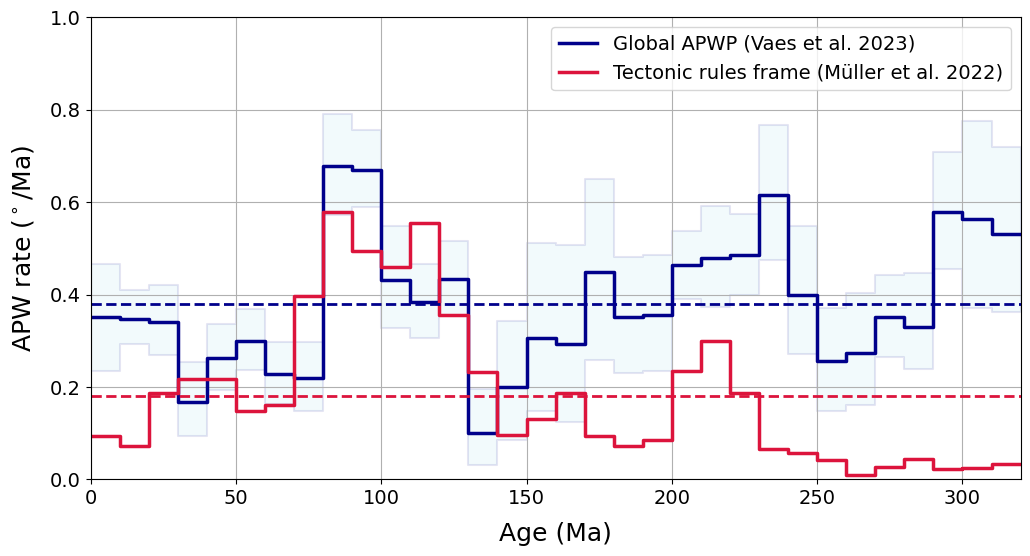

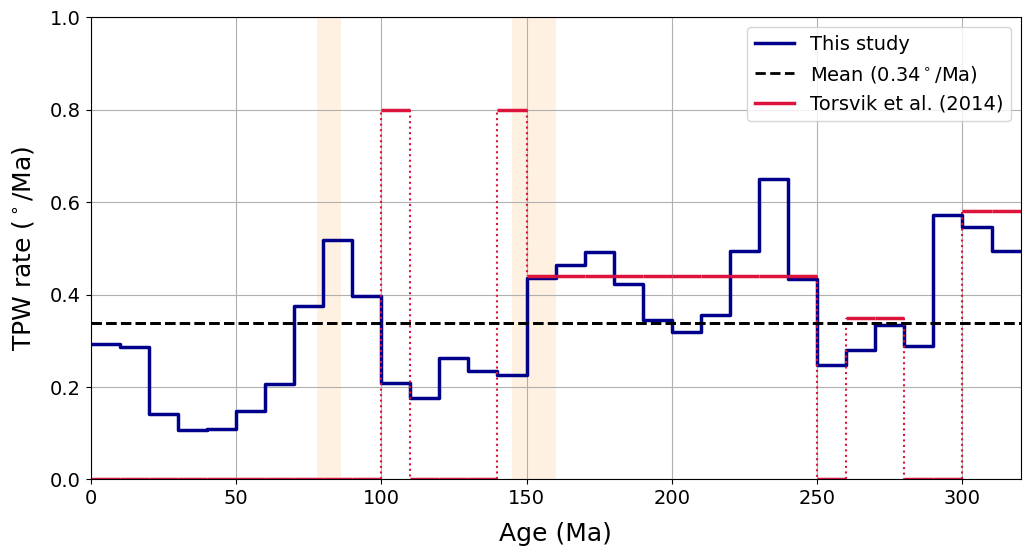

In [28]:
# get TPW rates from Torsvik et al. (2014)
T14 = pd.read_csv('rates_T14.csv',skiprows=0,header=0,skip_blank_lines=True) # build dataframe from Excel input file

if frame == 'M22':
    
    # --------
    # plot APW rates of rotated APWP
    fignum=2
    plt.figure(num=fignum,figsize=(12,6),facecolor='white',dpi=100)

    # PW rates
    plt.step(df['age'],df['PW_rate'],lw=2.5,color='darkblue')
    plt.fill_between(df['age'],df['PW_rate_low'],y2=df['PW_rate_high'],step='pre',color='skyblue',alpha=0.1,edgecolor='darkblue',lw=1.5)

    # rates for Müller et al. (2022) mantle frame
    if dt == 10:
        plt.step(range(0,t_max+dt,dt),MPWP_rates_10,lw=2.5,color='crimson')
        plt.axhline(np.mean(MPWP_rates_10),linestyle='--',c='crimson',lw=2)
    else:
        plt.step(range(0,t_max+dt,dt),MPWP_rates,lw=2.5,color='crimson')
        plt.axhline(np.mean(MPWP_rates),linestyle='--',c='crimson',lw=2)

    # plot mean TPW rates
    plt.axhline(np.mean(df['PW_rate']),linestyle='--',c='darkblue',lw=2)

    plt.xlabel('Age (Ma)',fontsize=18,labelpad=10)
    plt.ylabel('APW rate ($^\circ$/Ma)',fontsize=18,labelpad=10)
    if dt == 10:
        plt.ylim([0,1])
    else:
        plt.ylim([0,1.8])
    plt.xlim([0,t_max])
    plt.tick_params(labelsize=14)
    plt.grid(which='major',axis='both')
    legend_elements = [Line2D([0], [0], color='darkblue', label='Global APWP (Vaes et al. 2023)',lw=2.5),
                       Line2D([0], [0], color='crimson', label='Tectonic rules frame (Müller et al. 2022)',lw=2.5)]
    if frame == 'V23_int_5':
        plt.legend(loc=2,fontsize=14, handles=legend_elements)
    else:
        plt.legend(loc=1,fontsize=14, handles=legend_elements)
    plt.savefig('APW_rates.png',bbox_inches='tight',facecolor='white',dpi=300)
    plt.savefig('APW_rates.svg',bbox_inches='tight',facecolor='white',dpi=500)
    plt.show()

    fignum=2
    plt.figure(num=fignum,figsize=(12,6),facecolor='white',dpi=100)
    #for k in range(len(rates)):
     #   plt.hlines(rates[k],rot_APWP['age'][k],rot_APWP['age'][k+1], color='darkblue', linestyle='-', linewidth=2.5)
      #  if k!=0:
       #    plt.vlines(rot_APWP['age'][k],rates[k-1],rates[k], color='darkblue', linestyle='-', linewidth=2.5)
    plt.step(range(0,t_max+dt,dt),rates,lw=2.5,color='darkblue')
    plt.axhline(np.mean(rates),linestyle='--',c='k',lw=2)
    
    for k in range(len(T14)-1):
        plt.hlines(T14['PW_rate'][k],T14['age'][k],T14['age'][k+1],lw=2.5,color='crimson')
        if k!=0:
            plt.vlines(T14['age'][k],T14['PW_rate'][k-1],T14['PW_rate'][k], color='crimson', linestyle=':', linewidth=1.5)
    plt.axhline(np.mean(rates),linestyle='--',c='k',lw=2) # plot mean
    plt.fill_between(range(78,87),y1=0,y2=1.8,color='bisque',alpha=0.5,lw=0) # highlight proposed Late Cretaceous TPW event
    plt.fill_between(range(145,161),y1=0,y2=1.8,color='bisque',alpha=0.5,lw=0) # highlight proposed Jurassic monster polar shift
    if dt==5:
        plt.fill_between(range(265,321),y1=0,y2=1.8,color='lightgrey',alpha=0.3,lw=0)
    plt.xlabel('Age (Ma)',fontsize=18,labelpad=10)
    plt.ylabel('TPW rate ($^\circ$/Ma)',fontsize=18,labelpad=10)
    if dt == 10:
        plt.ylim([0,1])
    else:
        plt.ylim([0,1.5])
    plt.xlim([0,t_max])
    plt.tick_params(labelsize=14)
    plt.grid(which='major',axis='both')
    legend_elements = [Line2D([0], [0], color='darkblue', label='This study',lw=2.5),
                       Line2D([0], [0], color='k', linestyle='--',label='Mean (%1.2f$^\circ$/Ma)' % np.mean(rates),lw=2),
                      Line2D([0], [0], color='crimson', ls='-',label='Torsvik et al. (2014)',lw=2.5)]
    if frame == 'V23_int_5':
        plt.legend(loc=2,fontsize=14, handles=legend_elements)
    else:
        plt.legend(loc=1,fontsize=14, handles=legend_elements)
    plt.savefig('TPW_rates.png',bbox_inches='tight',facecolor='white',dpi=300)
    plt.savefig('TPw_rates.svg',bbox_inches='tight',facecolor='white',dpi=500)

## Determine TPW axes

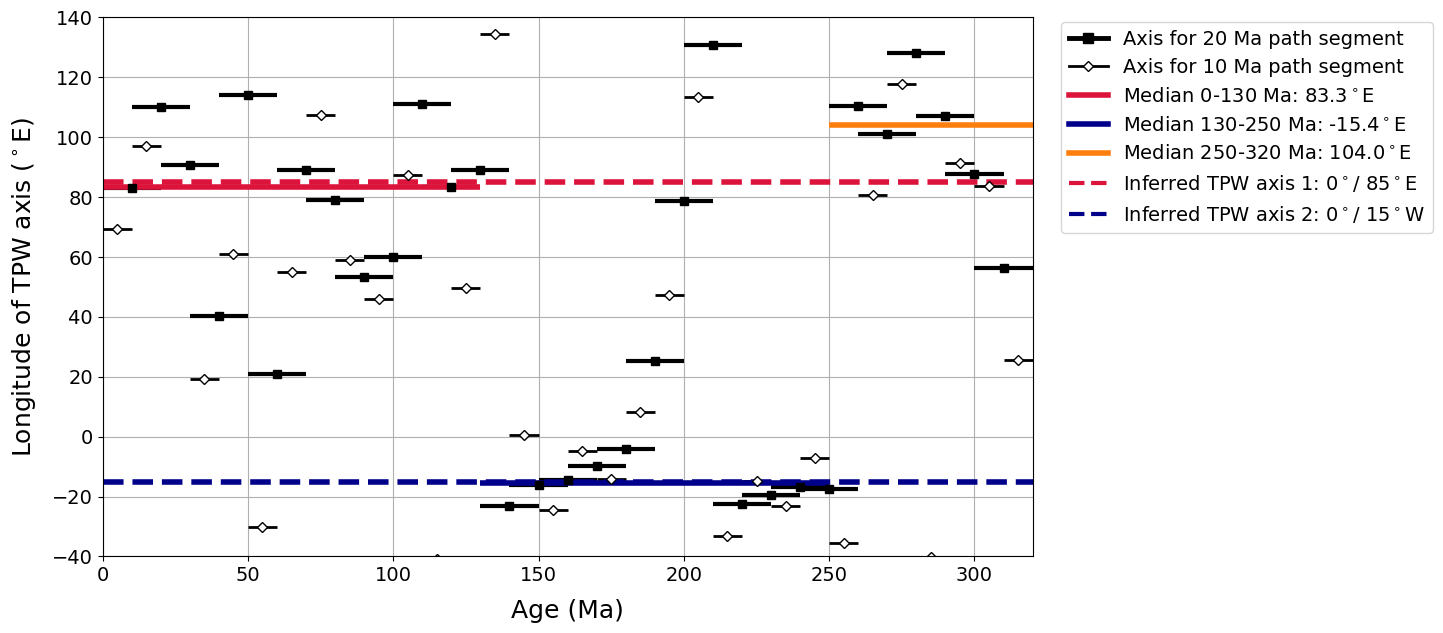

In [30]:
axes,axes2 = [],[]
for k in range(len(rot_APWP)-2):
    
    rlats,rlons = pmag.pt_rot([0,rot_APWP['plon'][k]-90.,90-rot_APWP['plat'][k]],[rot_APWP['plat'][k+2]],[rot_APWP['plon'][k+2]])
    if rlons[0]>90:
        int_lon = rlons[0]-180
    elif rlons[0]+90<-90:
        int_lon = rlons[0]+180
    else:
        int_lon = rlons[0]
    
    axis = int_lon + 90
    if axis > 135:
        axis = axis - 180
    axes.append(axis)
    
for k in range(len(rot_APWP)-1):   
    rlats,rlons = pmag.pt_rot([0,rot_APWP['plon'][k]-90.,90-rot_APWP['plat'][k]],[rot_APWP['plat'][k+1]],[rot_APWP['plon'][k+1]])
    if rlons[0]>90:
        int_lon = rlons[0]-180
    elif rlons[0]+90<-90:
        int_lon = rlons[0]+180
    else:
        int_lon = rlons[0]
    
    axis2 = int_lon + 90
    if axis2 > 135:
        axis2 = axis2 - 180
    axes2.append(axis2)
    
# plot ------
fignum=7
plt.figure(num=fignum,figsize=(12,7),facecolor='white',dpi=100)
plt.errorbar(range(10,t_max,10),axes,yerr=[0]*len(axes),xerr=[10]*len(axes),color='k',fmt='s',markeredgecolor='k',ecolor='k',elinewidth=3,capsize=4,capthick=0,markersize=6,linestyle=None)
plt.errorbar(range(5,t_max+5,10),axes2,yerr=[0]*len(axes2),xerr=[5]*len(axes2),color='white',fmt='D',markeredgecolor='k',ecolor='k',elinewidth=2,capsize=3,capthick=0,markersize=5,linestyle=None)
plt.hlines(-15,0,320,lw=4,color='darkblue',ls='--')
plt.hlines(85,0,320,lw=4,color='crimson',ls='--')
plt.hlines(np.median(axes[0:13]),0,130,lw=4,color='crimson',ls='-')
plt.hlines(np.median(axes[13:25]),130,250,lw=4,color='darkblue',ls='-')
plt.hlines(np.median(axes[25:31]),250,320,lw=4,color='tab:orange',ls='-')
plt.ylim([-40,140])
plt.xlim([0,320])
plt.tick_params(labelsize=14)
plt.grid(which='major',axis='both')
legend_elements = [Line2D([0], [0], marker='s', color='k',ls='-',markerfacecolor='k',mec='k',markersize=7,lw=3.5,label='Axis for 20 Ma path segment'),
                   Line2D([0], [0], marker='D', color='k',ls='-',markerfacecolor='white',mec='k',markersize=5,lw=2,label='Axis for 10 Ma path segment'),
                   Line2D([0], [0], color='crimson', label='Median 0-130 Ma: %1.1f$^\circ$E' % np.median(axes[0:13]),lw=4),
                   Line2D([0], [0], color='darkblue', linestyle='-',label='Median 130-250 Ma: %1.1f$^\circ$E' % np.median(axes[13:25]),lw=4),
                   Line2D([0], [0], color='tab:orange', linestyle='-',label='Median 250-320 Ma: %1.1f$^\circ$E' % np.median(axes[25:]),lw=4),
                  Line2D([0], [0], color='crimson', ls='--',label='Inferred TPW axis 1: 0$^\circ$/ 85$^\circ$E',lw=3),
                  Line2D([0], [0], color='darkblue', ls='--',label='Inferred TPW axis 2: 0$^\circ$/ 15$^\circ$W',lw=3)]
plt.legend(bbox_to_anchor=(1.02, 1.01),fontsize=14, handles=legend_elements,frameon=True)
plt.xlabel('Age (Ma)',fontsize=18,labelpad=10)
plt.ylabel('Longitude of TPW axis ($^\circ$E)',fontsize=18,labelpad=10)
plt.savefig('TPW_axis.png',bbox_inches='tight',facecolor='white',dpi=300)
plt.show()

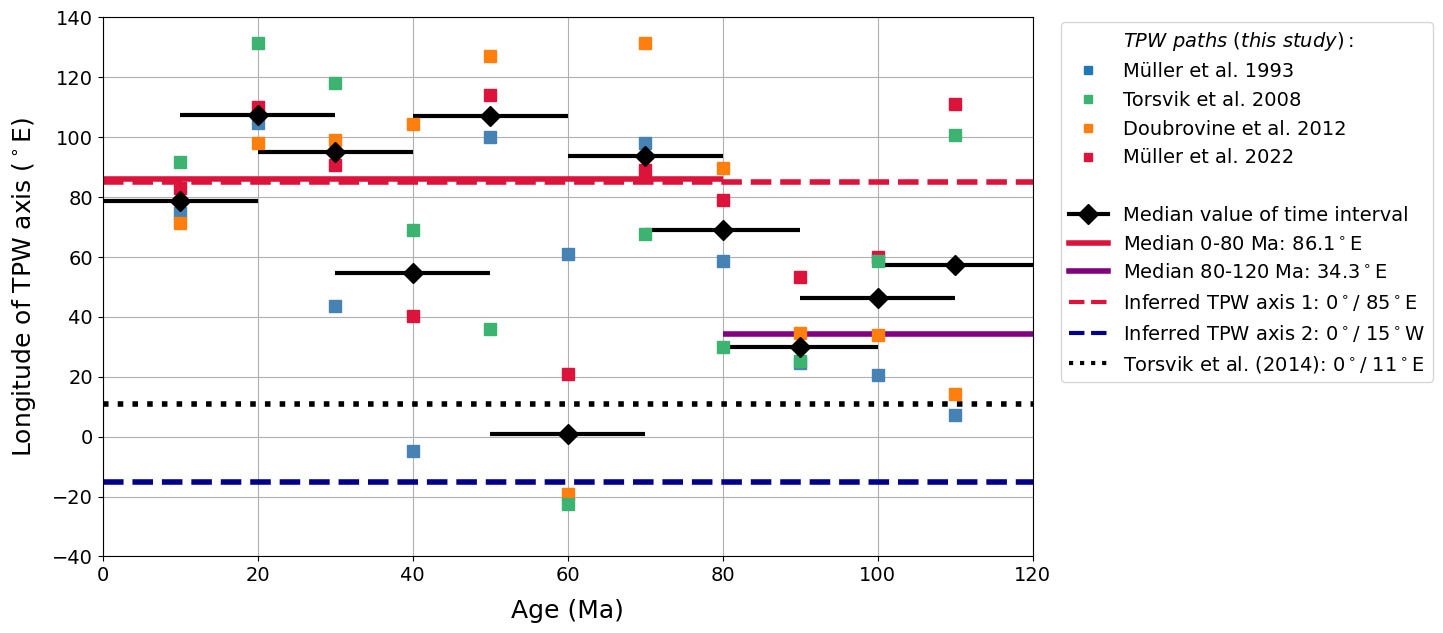

In [31]:
for k in range(12):
        angle_M22 = pmag.angle([TPWPs['lon_M22'][k],TPWPs['lat_M22'][k]],[TPWPs['lon_M22'][k+1],TPWPs['lat_M22'][k+1]])
        rates_M22.append(angle_M22[0]/10)
        
        angle_M93 = pmag.angle([TPWPs['lon_M93'][k],TPWPs['lat_M93'][k]],[TPWPs['lon_M93'][k+1],TPWPs['lat_M93'][k+1]])
        rates_M93.append(angle_M93[0]/10)
        
        angle_D12 = pmag.angle([TPWPs['lon_D12'][k],TPWPs['lat_D12'][k]],[TPWPs['lon_D12'][k+1],TPWPs['lat_D12'][k+1]])
        rates_D12.append(angle_D12[0]/10)
        
        angle_T08 = pmag.angle([TPWPs['lon_T08'][k],TPWPs['lat_T08'][k]],[TPWPs['lon_T08'][k+1],TPWPs['lat_T08'][k+1]])
        rates_T08.append(angle_T08[0]/10)
        
axes2,axes3,axes4,medians = [],[],[],[]
for k in range(11):
    rlats,rlons = pmag.pt_rot([0,TPWPs['lon_M93'][k]-90.,90-TPWPs['lat_M93'][k]],[TPWPs['lat_M93'][k+2]],[TPWPs['lon_M93'][k+2]])
    if rlons[0]>90:
        int_lon = rlons[0]-180
    elif rlons[0]+90<-90:
        int_lon = rlons[0]+180
    else:
        int_lon = rlons[0]
    axis2 = int_lon + 90
    if axis2 > 135:
        axis2 = axis2 - 180
    axes2.append(axis2)
    #--
    rlats,rlons = pmag.pt_rot([0,TPWPs['lon_D12'][k]-90.,90-TPWPs['lat_D12'][k]],[TPWPs['lat_D12'][k+2]],[TPWPs['lon_D12'][k+2]])
    if rlons[0]>90:
        int_lon = rlons[0]-180
    elif rlons[0]+90<-90:
        int_lon = rlons[0]+180
    else:
        int_lon = rlons[0]
    axis3 = int_lon + 90
    if axis3 > 135:
        axis3 = axis3 - 180
    axes3.append(axis3)
    #--
    rlats,rlons = pmag.pt_rot([0,TPWPs['lon_T08'][k]-90.,90-TPWPs['lat_T08'][k]],[TPWPs['lat_T08'][k+2]],[TPWPs['lon_T08'][k+2]])
    if rlons[0]>90:
        int_lon = rlons[0]-180
    elif rlons[0]+90<-90:
        int_lon = rlons[0]+180
    else:
        int_lon = rlons[0]
    axis4 = int_lon + 90
    if axis4 > 135:
        axis4 = axis4 - 180
    axes4.append(axis4)
    
    medians.append(np.median([axes[k],axis2,axis3,axis4]))
    
total_axes = axes[0:8]+axes2[0:8]+axes3[0:8]+axes4[0:8]

after80_axes = axes[8:11]+axes2[8:]+axes3[8:]+axes4[8:]
     
# plot ------
fignum=7
plt.figure(num=fignum,figsize=(12,7),facecolor='white',dpi=100)
plt.errorbar(range(10,120,10),axes[0:11],yerr=[0]*len(axes2),xerr=[0]*len(axes2),color='crimson',fmt='s',markeredgecolor=None,ecolor='darkgrey',elinewidth=1.5,capsize=2,capthick=0,markersize=8,linestyle=None)
plt.errorbar(range(10,120,10),axes2,yerr=[0]*len(axes2),xerr=[0]*len(axes2),color='steelblue',fmt='s',markeredgecolor=None,ecolor='darkgrey',elinewidth=1.5,capsize=2,capthick=0,markersize=8,linestyle=None)
plt.errorbar(range(10,120,10),axes3,yerr=[0]*len(axes2),xerr=[0]*len(axes2),color='tab:orange',fmt='s',markeredgecolor=None,ecolor='darkgrey',elinewidth=1.5,capsize=2,capthick=0,markersize=8,linestyle=None)
plt.errorbar(range(10,120,10),axes4,yerr=[0]*len(axes2),xerr=[0]*len(axes2),color='mediumseagreen',fmt='s',markeredgecolor=None,ecolor='darkgrey',elinewidth=1.5,capsize=2,capthick=0,markersize=8,linestyle=None)
plt.errorbar(range(10,120,10),medians,yerr=[0]*len(axes2),xerr=[10]*len(axes2),color='k',fmt='D',markeredgecolor='k',ecolor='k',elinewidth=3,capsize=2,capthick=0,markersize=10,linestyle=None)

plt.hlines(-15,0,320,lw=4,color='darkblue',ls='--')
plt.hlines(85,0,320,lw=4,color='crimson',ls='--')
plt.hlines(11,0,320,lw=4,color='k',ls=':')
plt.hlines(np.median(total_axes),0,80,lw=4,color='crimson',ls='-')
plt.hlines(np.median(after80_axes),80,120,lw=4,color='purple',ls='-')
plt.ylim([-40,140])
plt.xlim([0,120])
plt.tick_params(labelsize=14)
plt.grid(which='major',axis='both')
legend_elements = [Line2D([0], [0], marker=None, color='white',markerfacecolor='white', markeredgecolor='white', label='$\it{TPW\ paths\ (this\ study):}$',lw=3),
                  Line2D([0], [0], marker='s', color='white',ls='-',markerfacecolor='tab:blue',mec='tab:blue',markersize=6,lw=1.5,label='Müller et al. 1993'),
                   Line2D([0], [0], marker='s', color='white',ls='-',markerfacecolor='mediumseagreen',mec='mediumseagreen',markersize=6,lw=1.5,label='Torsvik et al. 2008'),
                   Line2D([0], [0], marker='s', color='white',ls='-',markerfacecolor='tab:orange',mec='tab:orange',markersize=6,lw=1.5,label='Doubrovine et al. 2012'),
                   Line2D([0], [0], marker='s', color='white',ls='-',markerfacecolor='crimson',mec='crimson',markersize=6,lw=1.5,label='Müller et al. 2022'),
                   Line2D([0], [0], marker=None, color='white',markerfacecolor='white', markeredgecolor='white', label='',lw=3),
                   Line2D([0], [0], marker='D', color='k',ls='-',markerfacecolor='k',mec='k',markersize=10,lw=3,label='Median value of time interval'),
                   Line2D([0], [0], color='crimson', label='Median 0-80 Ma: %1.1f$^\circ$E' % np.median(total_axes),lw=4),
                   Line2D([0], [0], color='purple', linestyle='-',label='Median 80-120 Ma: %1.1f$^\circ$E' % np.median(after80_axes),lw=4),
                  Line2D([0], [0], color='crimson', ls='--',label='Inferred TPW axis 1: 0$^\circ$/ 85$^\circ$E',lw=3),
                  Line2D([0], [0], color='darkblue', ls='--',label='Inferred TPW axis 2: 0$^\circ$/ 15$^\circ$W',lw=3),
                  Line2D([0], [0], color='k', ls=':',label='Torsvik et al. (2014): 0$^\circ$/ 11$^\circ$E',lw=3)]
plt.legend(bbox_to_anchor=(1.02, 1.01),fontsize=14, handles=legend_elements,frameon=True)
plt.xlabel('Age (Ma)',fontsize=18,labelpad=10)
plt.ylabel('Longitude of TPW axis ($^\circ$E)',fontsize=18,labelpad=10)
plt.savefig('TPW_axis_last120.png',bbox_inches='tight',facecolor='white',dpi=300)
plt.show()

## Test rotation around axes

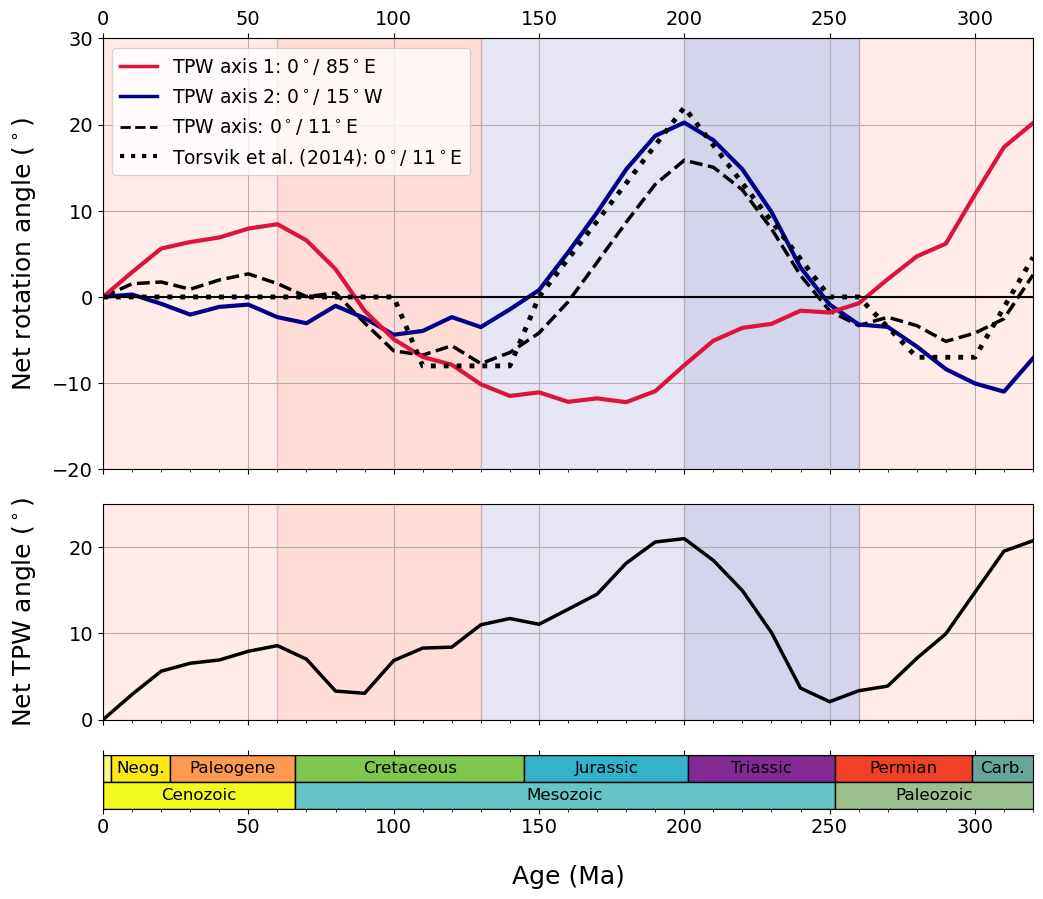

In [33]:
def rot_around_axis(pwp,axis):
    """
    Compute total rotations implied by polar wander path around chosen axis
    
    Required input:
    df: dataframe with polar wander path
    axis: [longitude,latitude]

    Output:
    list with rotations
    """
    rotations = []                                                                  
    for i in range(len(pwp)):
        if i == 0:
            rot = 0
        else:
            rot,drot = rf.R_pole_space([pwp['plon'][i],pwp['plat'][i]],0,[0,90],0,axis)
        
            # test positive or negative
            angle1 = pmag.angle([pwp['plon'][i],pwp['plat'][i]],[axis[0]+90,0])
            angle0 = pmag.angle([pwp['plon'][i-1],pwp['plat'][i-1]],[axis[0]-90,0])
            if angle1[0] > 90:
                rot = rot * -1
        
        rotations.append(rot)
                                                                      
    return rotations

# --------
axis1 = [11,0]
axis2 = [-15,0]
axis3 = [80,0]
                                                                      
rots_ax1 = rot_around_axis(rot_APWP,axis1)
rots_ax2 = rot_around_axis(rot_APWP,axis2)
rots_ax3 = rot_around_axis(rot_APWP,axis3)

# --------

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

f, (ax1,ax2, ax3) = plt.subplots(3, 1, sharex='all',figsize=(12,10), height_ratios=[8, 4, 1], dpi=100, facecolor='white')
plt.subplots_adjust(hspace=0.15)

# PLOT                                                                  
ax1.plot(rot_APWP['age'],rots_ax1, color='k', linestyle='--', linewidth=2.5)
ax1.plot(rot_APWP['age'],rots_ax2, color='darkblue', linestyle='-', linewidth=3)
ax1.plot(rot_APWP['age'],rots_ax3, color='crimson', linestyle='-', linewidth=3)
ax1.plot(range(0,330,10),T14['net_angle']*-1, color='k', linestyle=':', linewidth=3.5)
ax1.hlines(0,0,320,lw=1.5,color='k')
ax1.fill_between(range(0,65,5),y1=-30,y2=30,color='tomato',alpha=0.12,edgecolor='darkred',lw=0)
ax1.fill_between(range(60,135,5),y1=-30,y2=30,color='tomato',alpha=0.22,edgecolor='darkred',lw=1)
ax1.fill_between(range(130,210,10),y1=-30,y2=30,color='darkblue',alpha=0.1,edgecolor='darkblue',lw=0)
ax1.fill_between(range(200,270,10),y1=-30,y2=30,color='darkblue',alpha=0.17,edgecolor='darkblue',lw=1)
ax1.fill_between(range(260,330,10),y1=-30,y2=30,color='tomato',alpha=0.12,edgecolor='darkred',lw=1)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.set_ylabel('Net rotation angle ($^\circ$)',fontsize=18,labelpad=10)
ax1.set_ylim([-20,30])
ax1.set_xlim([0,320])
ax1.tick_params(labelsize=14,top=True, labeltop=True, bottom=True, labelbottom=False)
ax1.grid(which='major',axis='both')
legend_elements = [Line2D([0], [0], color='crimson', linestyle='-',label='TPW axis 1: 0$^\circ$/ 85$^\circ$E',lw=2.5),
                  Line2D([0], [0], color='darkblue', label='TPW axis 2: 0$^\circ$/ 15$^\circ$W',lw=2.5),
                   Line2D([0], [0], color='k', ls='--',label='TPW axis: 0$^\circ$/ 11$^\circ$E',lw=2),
                  Line2D([0], [0], color='k', ls=':',label='Torsvik et al. (2014): 0$^\circ$/ 11$^\circ$E',lw=3)]
ax1.legend(loc=2,fontsize=13.5, handles=legend_elements)

# ---------
# COMPUTE AND PLOT NET TPW ANGLE
TPW_angles = []
for i in range(len(rot_APWP)):
    TPW_angle = pmag.angle([rot_APWP['plon'][i],rot_APWP['plat'][i]],[0,90])
    TPW_angles.append(TPW_angle[0])
    
ax2.plot(rot_APWP['age'],TPW_angles, color='k', linestyle='-', linewidth=2.5)
ax2.fill_between(range(0,65,5),y1=-30,y2=30,color='tomato',alpha=0.12,edgecolor='darkred',lw=0)
ax2.fill_between(range(60,135,5),y1=-30,y2=30,color='tomato',alpha=0.22,edgecolor='darkred',lw=1)
ax2.fill_between(range(130,210,10),y1=-30,y2=30,color='darkblue',alpha=0.1,edgecolor='darkblue',lw=0)
ax2.fill_between(range(200,270,10),y1=-30,y2=30,color='darkblue',alpha=0.17,edgecolor='darkblue',lw=1)
ax2.fill_between(range(260,330,10),y1=-30,y2=30,color='tomato',alpha=0.12,edgecolor='darkred',lw=1)
ax2.set_ylabel('Net TPW angle ($^\circ$)',fontsize=18,labelpad=22)
ax2.set_ylim([0,25])
ax2.set_yticks([0,10,20])
ax2.set_xlim([0,320])
ax2.tick_params(labelsize=14)
ax2.grid(which='major',axis='both')

# ---------
from matplotlib.patches import Rectangle
from pyrolite.util.time import Timescale

ts = Timescale()

# Assuming ts.levels and ts.data are already defined
# Update the levels to include only Era and Period
ts.levels = ["Era", "Period"]
xlims = {
    "Era": (0, 1),
    "Period": (1, 2),
}

for ix, level in enumerate(ts.levels[::-1]):
    ldf = ts.data.loc[ts.data.Level == level, :]
    for pix, period in ldf.iterrows():
        left, right = xlims[level]
        if ix != len(ts.levels) - 1:
            time = np.mean(ts.text2age(period.Name))
            general = None
            _ix = ix
            while general is None:
                try:
                    general = ts.named_age(time, level=ts.levels[::-1][_ix + 1])
                except:
                    pass
                _ix += 1
            _l, _r = xlims[ts.levels[::-1][_ix]]
            if _r > left:
                left = _r

        rect = Rectangle(
            (period.End, left),
            period.Start - period.End,
            right - left,
            facecolor=period.Color,
            edgecolor="k",
        )
        ax3.add_artist(rect)
        
        # Add period name text
        if period.Start < 320. and period.Start > 25.:
            ax3.text(
            (period.Start + period.End) / 2,  # x position
            (left + right) / 2,  # y position
            period.Name,  # text
            ha='center',  # horizontal alignment
            va='center',  # vertical alignment
            fontsize=12,
            color='black'
            )
        elif period.Name == 'Neogene':
            ax3.text(
            (period.Start + period.End) / 2,  # x position
            (left + right) / 2,  # y position
            'Neog.',  # text
            ha='center',  # horizontal alignment
            va='center',  # vertical alignment
            fontsize=12,
            color='black'
            )
        elif period.Name == 'Carboniferous':
            ax3.text(
            (320. + period.End) / 2,  # x position
            (left + right) / 2,  # y position
            'Carb.',  # text
            ha='center',  # horizontal alignment
            va='center',  # vertical alignment
            fontsize=12,
            color='black'
            )
        elif period.Name == 'Paleozoic':
            ax3.text(
            (320. + period.End) / 2,  # x position
            (left + right) / 2,  # y position
            'Paleozoic',  # text
            ha='center',  # horizontal alignment
            va='center',  # vertical alignment
            fontsize=12,
            color='black'
            )
        
ax3.set_yticks([])
#ax3.set_yticklabels(ts.levels, rotation=0)
ax3.set_ylim(0, 2)
ax3.set_xlim(0,320)
ax3.tick_params(labelsize=14,top=True, labeltop=False, bottom=True, labelbottom=True)
ax3.set_xlabel('Age (Ma)',fontsize=18,labelpad=20)

plt.savefig('Fig_7.png',facecolor='white',dpi=300)
plt.savefig('Fig_7.svg',facecolor='white',dpi=300)
plt.show()